# COMP6252-Lecture1

In this lecture we introduce basic concepts that will be used throughout COMP6252. This is done with the help of the simplest model. In this session you will learn

1. Describe supervised Learning
1. Explain the role of loss functions in learning
1. Apply the method of gradient descent

## Prerequisites

This session assumes that you are familiar with basic calculus and Python. A good introduction to Python can be found in [this tutorial](https://docs.python.org/3/tutorial/)

## Supervised Learning

- Given a set of $n$ observations $\{(x_i,y_i),i=0,\ldots,n-1\}$, where $x$ and $y$ are the independent/dependent (possibly multidimensional) variables respectively. 

- Regression problem: the $y_i$'s are values in some subset of $R^n$, 
- Classification problem: the $y_i$'s are labels in a discrete set $\{1\ldots n\}$, 

- In both problems our goal is to find the correct $y$ for an arbitrary $x$



## Supervised Learning
- Assumption: there is some **unknown** function $h$ that maps the values of $x$ to values of $y=h(x)$ 

- Our task is to find an **approximation** for $h$.

- Simplest approximation for  $h$ is a linear(in the unknown parameters) function $f(x)=\sum_k\beta_k\phi_k(x)$ 
- $\beta_k$ are parameters to be determined and $\phi_k$'s are **known** functions.
- Example: for a straight line, $\phi_0(x)=1$,$\phi_1(x)=x$ and we need to determine the **best** values of $\beta_0$ and $\beta_1$.

## Linear Regression

- In this notebook we introduce linear regression. 
- The model is simple and we can obtain a closed form solution 
- makes an excellent example to illustrate concepts that will be used in the remainder of this module.

### Loss

- The best values for the parameters are the ones that give us $y$ as close as possible to the observed values. 
- One option is to choose the parameters that give us the **smallest** mean square error

\begin{align*}
\mathcal{L}=\frac{1}{n}\sum_i\left(y_i -f(x_i)\right)^2
\end{align*}




## Minimal loss
- The minimum occurs when the derivative is zero. 
- Therefore, the best value for the parameters are the ones that make the derivative of the loss function zero. 
- To find the best values for $\beta$ we need to solve the equation:

\begin{align*}
\frac{\partial\mathcal{L}}{\partial\beta}=0
\end{align*}



- Fortunately, for this simple model, we can obtain a solution in closed form
$$
\begin{align*}
\frac{\partial L}{\partial \beta}=-2\Phi y+2\Phi(\Phi^T\beta)
\end{align*}$$
Where $\Phi_{ki}=\phi_k(x_i)$. The solution is

$$\begin{align*}\beta=(\Phi\Phi^T)^{-1}\Phi y\end{align*}$$


- Recall that

$$f(x)=\sum_k\beta_k\phi_k(x)$$ 






### Special case: line model

- Special case, the model is a straight line, i.e. 

$$f(x)=\beta_0+\beta_1 x$$
- With   $\phi_0(x_i)=1$, $\phi_1(x_i)=x_i$. Therefore the matrix $\Phi$ becomes:

\begin{bmatrix} 1 & 1 & \ldots & 1 \\ 
   x_0 & x_1 & \ldots & x_{n-1}
\end{bmatrix}



**Optional**: If you are interested in how the above result was obtained click on the arrow below.

<details>
<summary>Click here</summary>
Assume that the model is linear:

$$f(x,\beta)=\sum_k\beta_k\phi_k(x)$$

Then the loss function can be written as 
$$\begin{align*} L&=\sum_i \left(y_i-f(x_i)\right)^2\\&=\sum_i\left(y_i-\sum_k\beta_k\phi_k(x_i)\right)^2\end{align*}$$
taking the derivative with respect to parameter $\beta_l$ we get
$$\begin{align*}\frac{\partial L}{\partial\beta_l}&=\\
&=2\sum_i\left(\ y_i\sum_k\beta_k\phi_k(z_i)\right)\frac{\partial}{\partial\beta_l}\left(y_i-\sum_k\beta_k\phi_k(x_i)\right)\\
&=-2\sum_i\left(y_i -\sum_k\beta_k\phi_k(x_i)\right)\phi_l(x_i)\\
&=-2\sum_iy_i\phi_l(x_i)+2\sum_i\phi_l(x_i)\sum_k\beta_k\phi_k(x_i)
\end{align*}$$

To write the above in matrix form let $\Phi_{ki}=\phi_k(x_i)$ then
    
$$
\begin{align*}
\frac{\partial L}{\partial \beta_l}=-2\Phi y+2\Phi(\Phi^T\beta)
\end{align*}$$
    
    
setting the derivatives to zero we finally get
$$\Phi y=\Phi(\Phi^T\beta)$$
and solving for $\beta$
$$\beta=(\Phi\Phi^T)^{-1}\Phi y$$

</details>

## Implementation in Python

- In this section the special case of the straight line model is implemented in Python.


- Create a set of random points with a linear trend

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Use list comprehension to generate 20 equidistant points
x=np.array([ i for i in range (1,20)])
# scale the x points
x=x/np.max(x)
# choose arbitrary slope and intercept
a,b=5.0,3.0
# generate y from x using a straight line, with some random noise
# use a slope of a (i.e. beta1) and intercept  of b (i.e. beta0)
y=np.array([a*z+np.random.uniform()+b for z in x])

In [ ]:
plt.plot(x,y,'o')
plt.xlim([0,1.1])
plt.ylim([np.min(y)-1,np.max(y)+1])
plt.show()

- recall that

$$
\Phi=\begin{bmatrix} 1 & 1 & \ldots & 1 \\ 
   x_0 & x_1 & \ldots & x_{n-1}
\end{bmatrix}
$$

$$\begin{align*}\beta=(\Phi\Phi^T)^{-1}\Phi y\end{align*}$$


In [ ]:

# stack an array of 1's and x on top of each other to create PHI
PHI=np.vstack((np.ones(x.shape[0]),x))
# PHI transpose
PHI_T=PHI.T
# Compute product of PHI with PHI transpose
r=np.matmul(PHI,PHI_T)
# Compute the inverse
rinv=np.linalg.inv(r)
beta=np.matmul(rinv,np.matmul(PHI,y))

- Generate a straight line with $\beta_1$ as slope and $\beta_1$ as intercept

In [ ]:
print(beta)
# generate a straight line using the optimal slope and intercept
closed_form=[beta[0]+beta[1]*x for x in x]

- Plot the solution along with the data

In [ ]:
import matplotlib.pyplot as plt
#fig,ax=plt.subplots()
plt.plot(x,y,'o')
plt.plot(x,closed_form)
plt.xlim([0,np.max(x)+1])
plt.ylim([np.min(y)-1,np.max(y)+1])
plt.show()

## Gradient Descent

- In many situations the solution for $\frac{\partial f}{\partial\beta}=0$ cannot be found in closed form. 
- An alternative is to use **gradient descent**. 
- The idea is to update the parameters in the opposite direction of the gradient. 
- By iterating the procedure we hope to find the values of the parameters that make the gradient vanish.


- $\frac{\partial f}{\partial\beta}<0$ , increase $\beta$ 
- $\frac{\partial f}{\partial\beta}>0$, decrease $\beta$ 

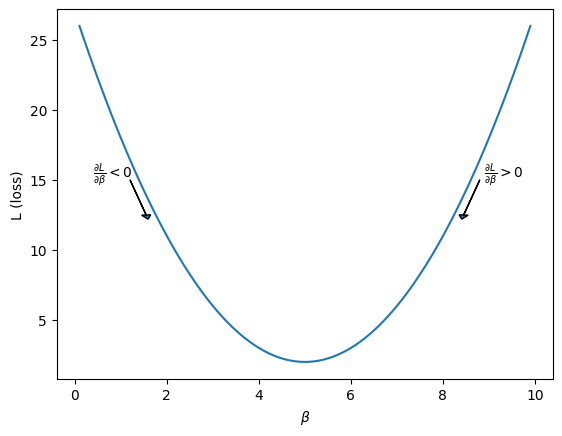


- The question of **how much** to increment/decrement remains. 
- From the figure it is clear that a large increment/decrement would make the value of $\beta$ **overshoot** the minimum. 
- This is why the increment/decrements are controlled by a **learning rate**. 
- Therefore, for gradient descent, the parameters are updated using

\begin{align*}
\beta_{new}=\beta_{old}-rate\times\frac{\partial\mathcal{L}}{\partial\beta}
\end{align*}
- Where $\mathcal{L}$ is a loss function


- Start with random values for $\beta_0$ and $\beta_1$
- Use gradient descent to find the **optimal** $\beta_0$ and $\beta_1$
- Also, save a list all intermediate values of $\beta$ between intial and optima in variable ```path```
- Recall that 
$$
\begin{align*}
\frac{\partial\mathcal{L}}{\partial \beta}=-2\Phi y+2\Phi(\Phi^T\beta)
\end{align*}$$

In [ ]:
beta=np.random.uniform(size=(2))
path=[]
def gradient(beta):
    a=-2*np.matmul(PHI,y)
    b=2*np.matmul(PHI,np.matmul(PHI_T,beta))
    return a+b

- Now that we have an expression for $\frac{\partial\mathcal{L}}{\partial\beta}$ and initial values for $\beta$
- We iterate over
\begin{align*}
\beta_{new}=\beta_{old}-rate\times\frac{\partial\mathcal{L}}{\partial\beta}
\end{align*}
- Saving intermediate values every 10 iterations

In [ ]:

rate=0.01
for i in range(300):
    db=gradient(beta)
    beta=beta-rate*db
    if(i%10==0):
        path.append(beta)
print(beta)


- Create an animation from the lines formed by all values of $\beta$ from initial to optimal

In [ ]:
def line(p,x):
    return [p[0]+p[1]*x for x in x]

def animate(i):
    #print("i is {}".format(i))
    ax.clear()
    ax.plot(x,y,'o')
    ax.plot(x,closed_form,'--',color='blue')
    ax.plot(x,line(path[i],x),color='red')
    ax.set_xlim([0,np.max(x)])
    ax.set_ylim([0,np.max(y)])


In [ ]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
fig,ax=plt.subplots()
an=FuncAnimation(fig, animate, frames=20, interval=500, repeat=False)
plt.show()